In [2]:
## IMPORT MODULES/LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import optimize
import statsmodels.api as sm

### Import and clean data:

In [3]:
# Import causeway bay air quality data for 2019 and 2020 

file_2019 = open('2019_complete_data.csv', encoding='iso8859')
file_2020 = open('2020_complete_data.csv', encoding='iso8859')
#file__2020 = open('2020_complete-data.csv', encoding='iso8859')

In [4]:
# MAKE PANDAS DATAFRAME FOR THE DATA

air_2019 = pd.read_csv(file_2019)
air_2020 = pd.read_csv(file_2020)
#air_2020 = pd.read_csv(file_2020_)

In [5]:
# CONVERT DATAFRAME TO NUMERICAL VALUES

air_2019 = air_2019.apply(pd.to_numeric, errors='coerce')
air_2020 = air_2020.apply(pd.to_numeric, errors='coerce')

In [7]:
# Remove 'date' and 'station' column from the data, to prepare for next step

air_2019 = air_2019[['CO','FSP','NO2','NOX','O3','RSP','SO2']]
air_2020 = air_2020[['CO','FSP','NO2','NOX','O3','RSP','SO2']]

In [8]:
# Remove NaN values
# If NaN present, remove entire row

air_2019.dropna(inplace=True, how='any', axis=0)
air_2020.dropna(inplace=True, how='any', axis=0)

/Users/milindsharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
# Assign columns of the dataframe to specific data parameters
# This has been done for simplicity and readability of code

co_2019 = air_2019['CO']
co_2020 = air_2020['CO']

no2_2019 = air_2019['NO2']
no2_2020 = air_2020['NO2']

nox_2019 = air_2019['NOX']
nox_2020 = air_2020['NOX']

o3_2019 = air_2019['O3']
o3_2020 = air_2020['O3']

fsp_2019 = air_2019['FSP']
fsp_2020 = air_2020['FSP']

so2_2019 = air_2019['SO2']
so2_2020 = air_2020['SO2']

### The data is now ready to analyse.
### 1. Data visualisation

### Boxplots

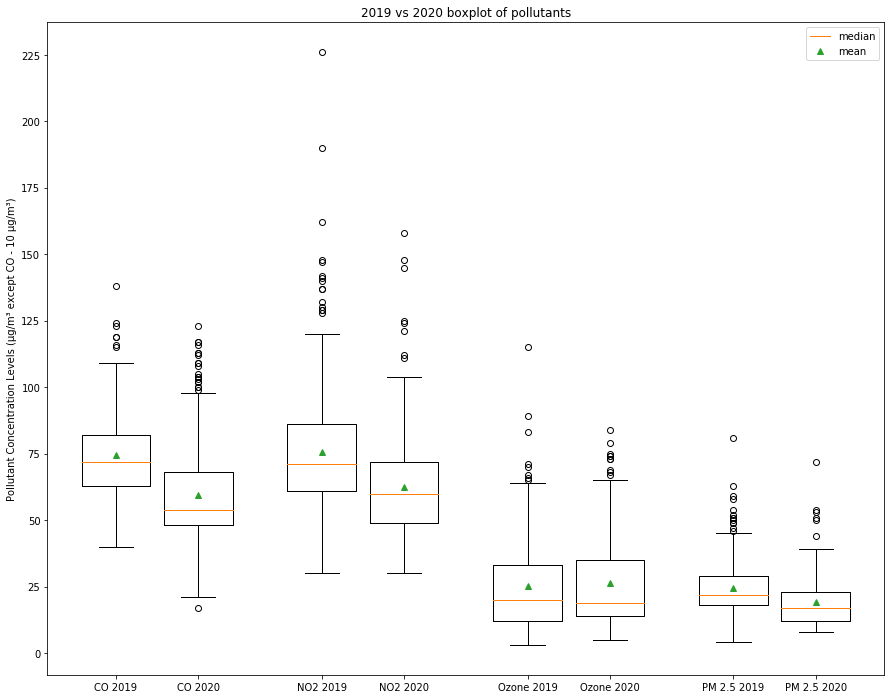

In [26]:
# the following pollutants have been plotted with a shared Y axis
# This is for ease of comparison
# SO2 and NOX have been plotted seperately without a shared y axis
# as their values are very different from the other pollutants

plot_data = [co_2019, co_2020,
            no2_2019, no2_2020,
            o3_2019, o3_2020,
            fsp_2019, fsp_2020]

plt.figure(figsize=(15,12))
plt.title('2019 vs 2020 boxplot of pollutants')
plt.ylabel('Pollutant Concentration Levels (µg/m\u00b3 except CO - 10 µg/m\u00b3)')

bp = plt.boxplot(plot_data,
            positions=[1,1.6, 2.5,3.1, 4,4.6, 5.5,6.1],
            labels=['CO 2019','CO 2020','NO2 2019','NO2 2020','Ozone 2019','Ozone 2020',
                   'PM 2.5 2019','PM 2.5 2020'],
            showmeans=True)
plt.yticks(np.arange(0,250,25))
plt.legend([bp['medians'][0], bp['means'][0]], ['median', 'mean'])

plt.show()

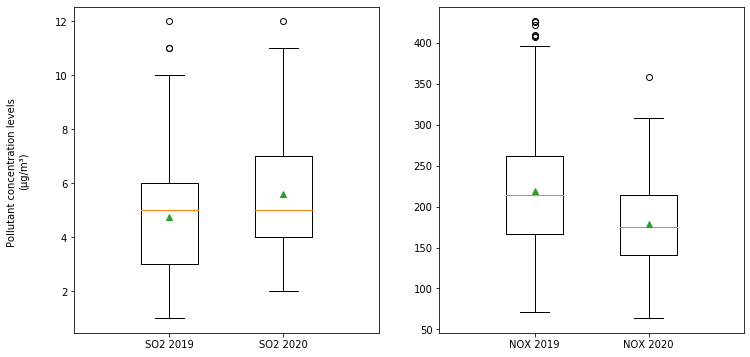

In [25]:

fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(12,6))

ax1.boxplot([so2_2019,so2_2020],
            labels=['SO2 2019','SO2 2020'],
            positions=[1,1.6],
            widths=0.3,
            showmeans=True,)

ax2.boxplot([nox_2019,nox_2020],
            labels=['NOX 2019','NOX 2020'],
            positions=[1,1.6],
            widths=0.3,
            showmeans=True)


fig.text(0.06, 0.5, 'Pollutant concentration levels \n(µg/m\u00b3)', ha='center', va='center', rotation='vertical')

plt.show()

### Violinplots

In [ ]:

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                              figsize=(10,6),
                              sharey=True)
           
sns.violinplot(y=so2_2019,ax=ax1,color='orange',)
sns.violinplot(y=so2_2020,ax=ax2)

plt.show()

In [60]:
np.histogram_bin_edges(co_2019,'fd')

# used freedman draconis rule to calculate bins

array([ 40.        ,  45.76470588,  51.52941176,  57.29411765,
        63.05882353,  68.82352941,  74.58823529,  80.35294118,
        86.11764706,  91.88235294,  97.64705882, 103.41176471,
       109.17647059, 114.94117647, 120.70588235, 126.47058824,
       132.23529412, 138.        ])

### 2. Analysis

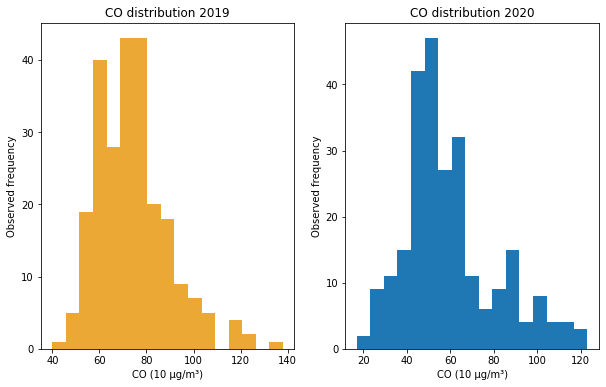

In [71]:
# Make histograms to analyse the distribution of pollutants

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

ax1.set_title('CO distribution 2019')
ax1.set_ylabel('Observed frequency')
ax1.set_xlabel('CO (10 µg/m\u00b3)')
ax1.hist(co_2019, bins=np.histogram_bin_edges(co_2019,'fd'), color='#eba834')

ax2.set_title('CO distribution 2020')
ax2.set_ylabel('Observed frequency')
ax2.set_xlabel('CO (10 µg/m\u00b3)')
ax2.hist(co_2020, bins=np.histogram_bin_edges(co_2020,'fd'))

plt.show()

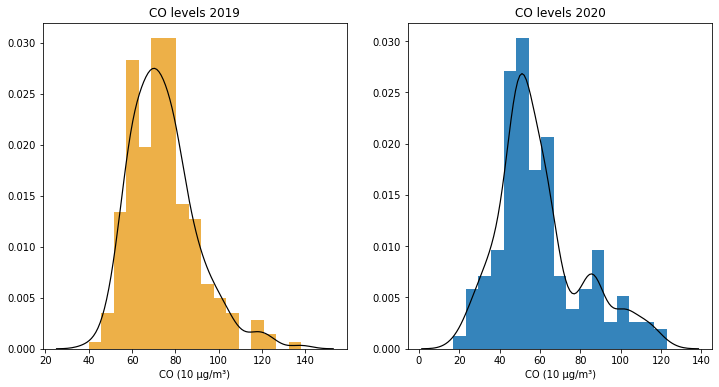

In [176]:
fig,axes=plt.subplots(1,2,figsize=(12,6))


sns.distplot(co_2019,bins=np.histogram_bin_edges(co_2019,'fd'),
             ax=axes[0],
             axlabel='CO (10 µg/m\u00b3)',
             hist_kws={"alpha": 0.9,'color':'#eba834'},
             kde_kws={"color": "black", "lw": 1.2,'alpha':1})
ax = axes[0].set_title('CO levels 2019')

sns.distplot(co_2020,bins=np.histogram_bin_edges(co_2020,'fd'),
             ax=axes[1],axlabel='CO (10 µg/m\u00b3)',
             hist_kws={"alpha": 0.9},
             kde_kws={"color": "black", "lw": 1.2,'alpha':1})
ax = axes[1].set_title('CO levels 2020')

plt.show()

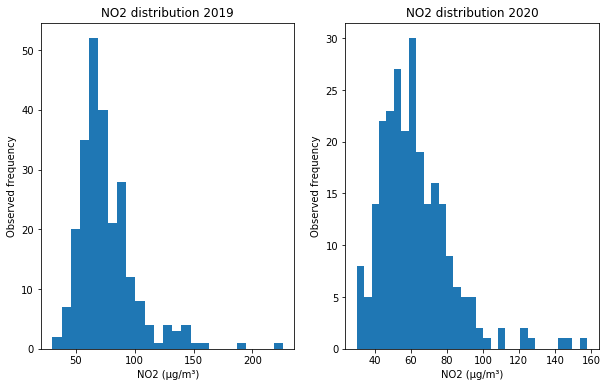

In [86]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

ax1.set_title('NO2 distribution 2019')
ax1.set_ylabel('Observed frequency')
ax1.set_xlabel('NO2 (µg/m\u00b3)')
ax1.hist(no2_2019, bins=np.histogram_bin_edges(no2_2019,'fd'))

ax2.set_title('NO2 distribution 2020')
ax2.set_ylabel('Observed frequency')
ax2.set_xlabel('NO2 (µg/m\u00b3)')
ax2.hist(no2_2020, bins=31)

plt.show()

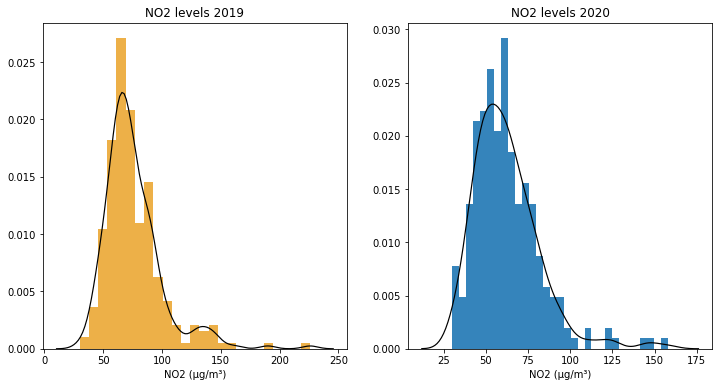

In [87]:
fig,axes=plt.subplots(1,2,figsize=(12,6))


sns.distplot(no2_2019,bins=np.histogram_bin_edges(no2_2019,'fd'),
             ax=axes[0],axlabel='NO2 (µg/m\u00b3)',
             hist_kws={"alpha": 0.9,'color':'#eba834'},
             kde_kws={"color": "black", "lw": 1.2,'alpha':1})
ax = axes[0].set_title('NO2 levels 2019')

sns.distplot(no2_2020,bins=31,
             ax=axes[1],axlabel='NO2 (µg/m\u00b3)',
             hist_kws={"alpha": 0.9},
             kde_kws={"color": "black", "lw": 1.2,'alpha':1})
ax = axes[1].set_title('NO2 levels 2020')

plt.show()

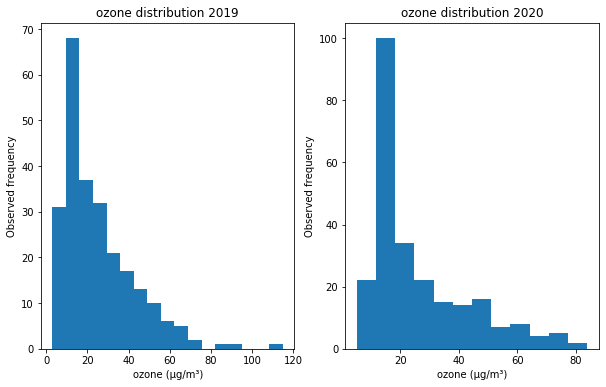

In [103]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

ax1.set_title('ozone distribution 2019')
ax1.set_ylabel('Observed frequency')
ax1.hist(o3_2019, bins=np.histogram_bin_edges(o3_2019,'fd'))
ax1.set_xlabel('ozone (µg/m\u00b3)')

ax2.set_title('ozone distribution 2020')
ax2.set_ylabel('Observed frequency')
ax2.set_xlabel('ozone (µg/m\u00b3)')
ax2.hist(o3_2020, bins=np.histogram_bin_edges(o3_2020,'fd'))

plt.show()

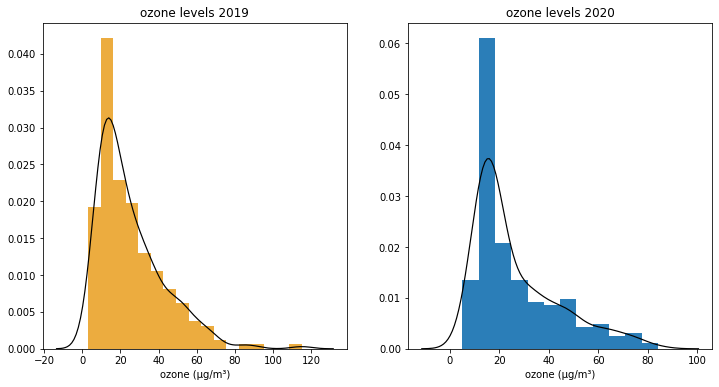

In [102]:
fig,axes=plt.subplots(1,2,figsize=(12,6))


sns.distplot(o3_2019,bins=np.histogram_bin_edges(o3_2019,'fd'),
             ax=axes[0],axlabel='ozone (µg/m\u00b3)',
             hist_kws={"alpha": 0.95,'color':'#eba834'},
             kde_kws={"color": "black", "lw": 1.2,'alpha':1})
ax = axes[0].set_title('ozone levels 2019')

sns.distplot(o3_2020,bins=np.histogram_bin_edges(o3_2020,'fd'),
             ax=axes[1],axlabel='ozone (µg/m\u00b3)',
             hist_kws={"alpha": 0.95},
             kde_kws={"color": "black", "lw": 1.2,'alpha':1})
ax = axes[1].set_title('ozone levels 2020')

plt.show()

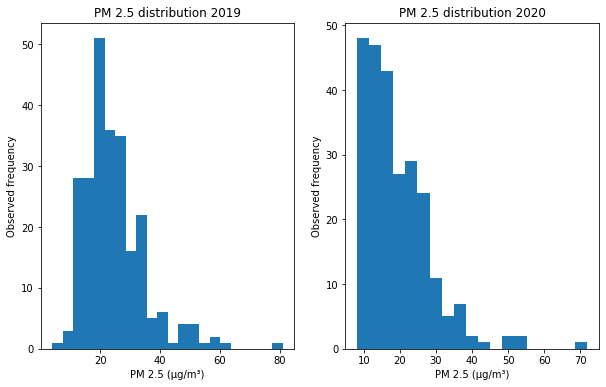

In [105]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

ax1.set_title('PM 2.5 distribution 2019')
ax1.set_ylabel('Observed frequency')
ax1.set_xlabel('PM 2.5 (µg/m\u00b3)')
ax1.hist(fsp_2019, bins=np.histogram_bin_edges(fsp_2019,'fd'))

ax2.set_title('PM 2.5 distribution 2020')
ax2.set_ylabel('Observed frequency')
ax2.set_xlabel('PM 2.5 (µg/m\u00b3)')
ax2.hist(fsp_2020, bins=np.histogram_bin_edges(fsp_2020,'fd'))

plt.show()

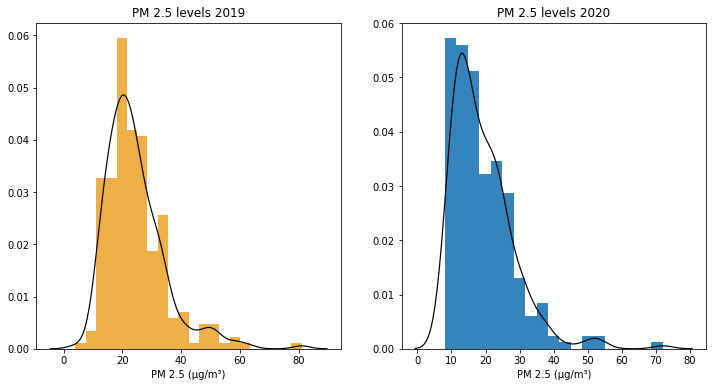

In [107]:
fig,axes=plt.subplots(1,2,figsize=(12,6))


sns.distplot(fsp_2019,bins=np.histogram_bin_edges(fsp_2019,'fd'),
             ax=axes[0],axlabel='PM 2.5 (µg/m\u00b3)',
             hist_kws={"alpha": 0.9,'color':'#eba834'},
             kde_kws={"color": "black", "lw": 1.2,'alpha':1})
ax = axes[0].set_title('PM 2.5 levels 2019')

sns.distplot(fsp_2020,bins=np.histogram_bin_edges(fsp_2020,'fd'),
             ax=axes[1],axlabel='PM 2.5 (µg/m\u00b3)',
             hist_kws={"alpha": 0.9},
             kde_kws={"color": "black", "lw": 1.2,'alpha':1})
ax = axes[1].set_title('PM 2.5 levels 2020')

plt.show()

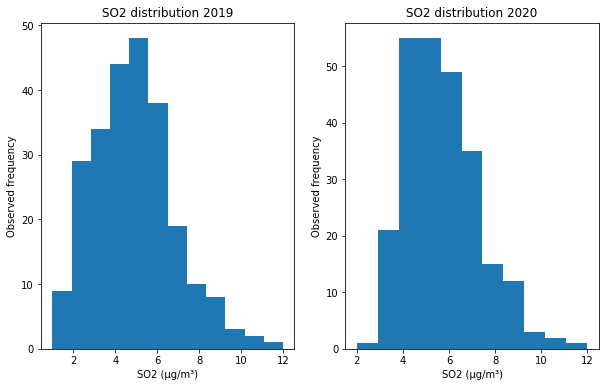

In [111]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

ax1.set_title('SO2 distribution 2019')
ax1.set_ylabel('Observed frequency')
ax1.set_xlabel('SO2 (µg/m\u00b3)')
ax1.hist(so2_2019, bins=np.histogram_bin_edges(so2_2019,'fd'))

ax2.set_title('SO2 distribution 2020')
ax2.set_ylabel('Observed frequency')
ax2.set_xlabel('SO2 (µg/m\u00b3)')
ax2.hist(so2_2020, bins=np.histogram_bin_edges(so2_2020,'fd'))

plt.show()

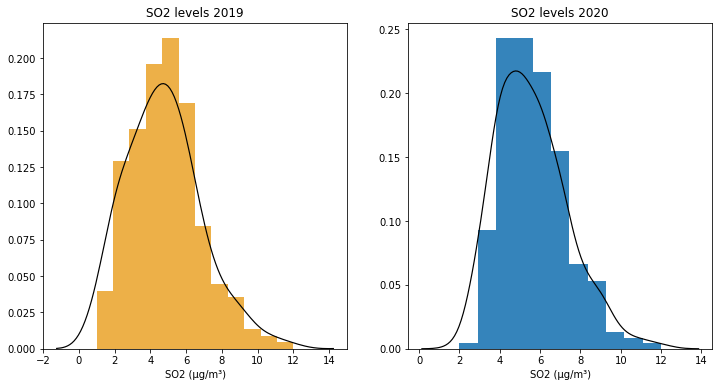

In [112]:
fig,axes=plt.subplots(1,2,figsize=(12,6))


sns.distplot(so2_2019,bins=np.histogram_bin_edges(so2_2019,'fd'),
             ax=axes[0],axlabel='SO2 (µg/m\u00b3)',
             hist_kws={"alpha": 0.9,'color':'#eba834'},
             kde_kws={"color": "black", "lw": 1.2,'alpha':1})
ax = axes[0].set_title('SO2 levels 2019')

sns.distplot(so2_2020,bins=np.histogram_bin_edges(so2_2020,'fd'),
             ax=axes[1],axlabel='SO2 (µg/m\u00b3)',
             hist_kws={"alpha": 0.9},
             kde_kws={"color": "black", "lw": 1.2,'alpha':1})
ax = axes[1].set_title('SO2 levels 2020')

plt.show()

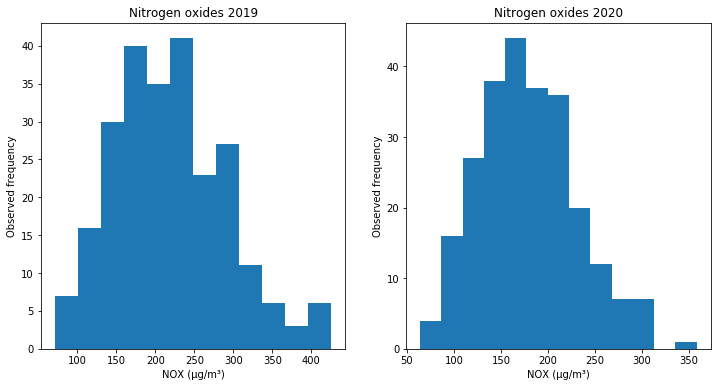

In [115]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

ax1.hist(nox_2019,bins=np.histogram_bin_edges(nox_2019,'fd'))
ax1.set_title('Nitrogen oxides 2019')
ax1.set_ylabel('Observed frequency')
ax1.set_xlabel('NOX (µg/m\u00b3)')

ax2.hist(nox_2020,bins=np.histogram_bin_edges(nox_2020,'fd'))
ax2.set_title('Nitrogen oxides 2020')
ax2.set_ylabel('Observed frequency')
ax2.set_xlabel('NOX (µg/m\u00b3)')

plt.show()

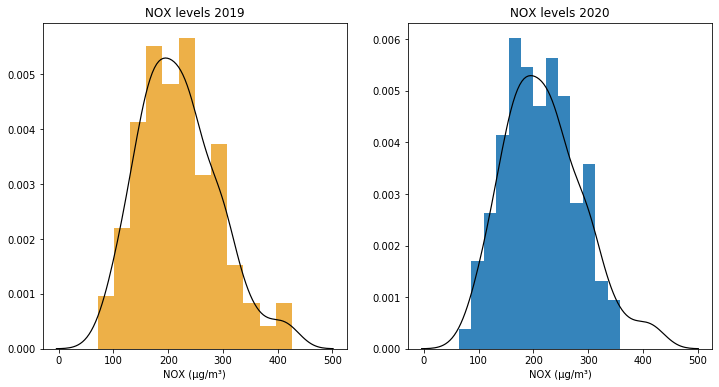

In [116]:
fig,axes=plt.subplots(1,2,figsize=(12,6))


sns.distplot(air_2019['NOX'],bins=np.histogram_bin_edges(nox_2019,'fd'),
             ax=axes[0],axlabel='NOX (µg/m\u00b3)',
             hist_kws={"alpha": 0.9,'color':'#eba834'},
             kde_kws={"color": "black", "lw": 1.2,'alpha':1})
ax = axes[0].set_title('NOX levels 2019')


sns.distplot(air_2019['NOX'],bins=np.histogram_bin_edges(nox_2020,'fd'),
             ax=axes[1],axlabel='NOX (µg/m\u00b3)',
             hist_kws={"alpha": 0.9},
             kde_kws={"color": "black", "lw": 1.2,'alpha':1})
ax = axes[1].set_title('NOX levels 2020')

plt.show()

In [118]:
# mean, SD values of various points of data

co19mean = np.mean(co_2019)
co20mean = np.mean(co_2020)

co19sd = np.std(co_2019)
co20sd = np.std(co_2020)

no2_19mean = np.mean(no2_2019)
no2_20mean = np.mean(no2_2020)

no2_19sd = np.std(no2_2019)
no2_20sd = np.std(no2_2020)

ozone19mean = np.mean(o3_2019)
ozone20mean = np.mean(o3_2020)

ozone_19sd = np.std(o3_2019)
ozone_20sd = np.std(o3_2020)

fsp19mean = np.mean(fsp_2019)
fsp20mean = np.mean(fsp_2020)

fsp19sd = np.std(fsp_2019)
fsp20sd = np.std(fsp_2020)

so2_19mean = np.mean(so2_2019)
so2_20mean = np.mean(so2_2020)

so2_19sd = np.std(so2_2019)
so2_20sd = np.std(so2_2020)

nox19mean = np.mean(nox_2019)
nox20mean = np.mean(nox_2020)

nox19sd = np.std(nox_2019)
nox20sd = np.std(nox_2020)

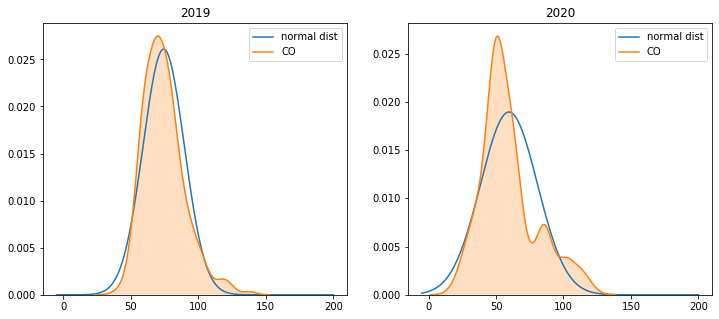

In [188]:
# NOW WE FIT THE DIST CURVE OF POLLUTANTS TO CURVE TO SEE

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

x = np.linspace(-5,200,500)
y = stats.norm.pdf(x,np.mean(co_2019),np.std(co_2019)) 
ax1.plot(x,y,label='normal dist') # normal continuous random variable of probability density function
sns.kdeplot(co_2019,shade=True,ax=ax1)
ax1.set_title('2019')

z = stats.norm.pdf(x,np.mean(co_2020),np.std(co_2020))
ax2.plot(x,z,label='normal dist')
sns.kdeplot(co_2020,shade=True,ax=ax2)
ax2.set_title('2020')

plt.show()  ## GOOD FIT for 2019, bad for 2020

In [183]:
print(stats.describe(co_2019))
print(stats.describe(co_2020))

DescribeResult(nobs=245, minmax=(40.0, 138.0), mean=74.39183673469388, variance=234.78845767815324, skewness=0.9804007475703178, kurtosis=1.503542153619402)
DescribeResult(nobs=249, minmax=(17.0, 123.0), mean=59.618473895582326, variance=445.47885088742066, skewness=0.8621969549170329, kurtosis=0.38841101978282877)


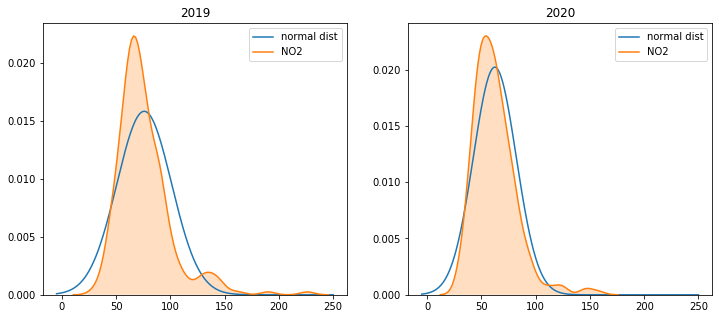

In [189]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

x = np.linspace(-5,250,500)
y = stats.norm.pdf(x,no2_19mean,no2_19sd) 
ax1.plot(x,y,label='normal dist') # normal continuous random variable of probability density function
sns.kdeplot(no2_2019,shade=True,ax=ax1)
ax1.set_title('2019')

z = stats.norm.pdf(x,no2_20mean,no2_20sd)
ax2.plot(x,z,label='normal dist')
sns.kdeplot(no2_2020,shade=True,ax=ax2)
ax2.set_title('2020')

plt.show()  

In [185]:
print(stats.describe(no2_2019))
print(stats.describe(no2_2020))

DescribeResult(nobs=245, minmax=(30.0, 226.0), mean=75.81224489795919, variance=637.0547674807627, skewness=1.9870763304989776, kurtosis=6.75360016992188)
DescribeResult(nobs=249, minmax=(30.0, 158.0), mean=62.30120481927711, variance=391.29197434900897, skewness=1.5475278339427698, kurtosis=4.186371277018859)


In [164]:
a,b,c = stats.chi2.fit(o3_2019)
l,m,n = stats.chi2.fit(o3_2020)

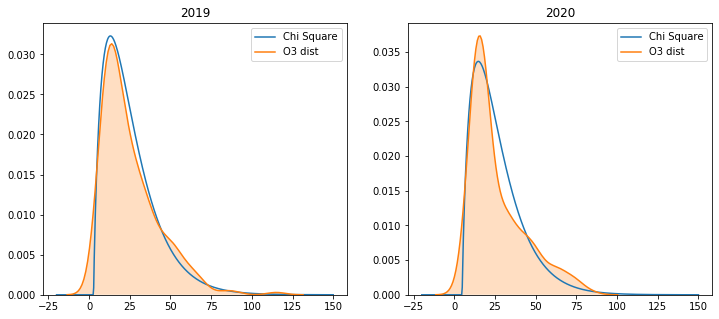

In [190]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

x = np.linspace(-20,150,500)
y = stats.chi2.pdf(x,a,b,c) 
ax1.plot(x,y,label='Chi Square') # normal continuous random variable of probability density function
sns.kdeplot(o3_2019,shade=True,ax=ax1,label='O3 dist')
ax1.set_title('2019')

z = stats.chi2.pdf(x,l,m,n) 
ax2.plot(x,z,label='Chi Square')
sns.kdeplot(o3_2020,shade=True,ax=ax2,label='O3 dist')
ax2.set_title('2020')

plt.show()  

In [192]:
a,b,c = stats.chi2.fit(fsp_2019)
l,m,n = stats.chi2.fit(fsp_2020)

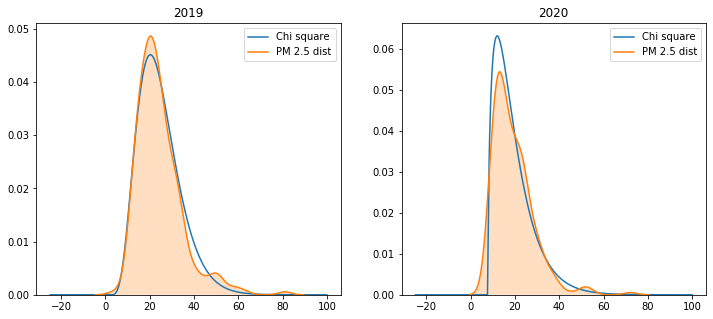

In [193]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

x = np.linspace(-25,100,500)
y = stats.chi2.pdf(x,a,b,c) 
ax1.plot(x,y,label='Chi square') # normal continuous random variable of probability density function
sns.kdeplot(fsp_2019,shade=True,ax=ax1,label='PM 2.5 dist')
ax1.set_title('2019')

z = stats.chi2.pdf(x,l,m,n) 
ax2.plot(x,z,label='Chi square')
sns.kdeplot(fsp_2020,shade=True,ax=ax2,label='PM 2.5 dist')
ax2.set_title('2020')

plt.show()  

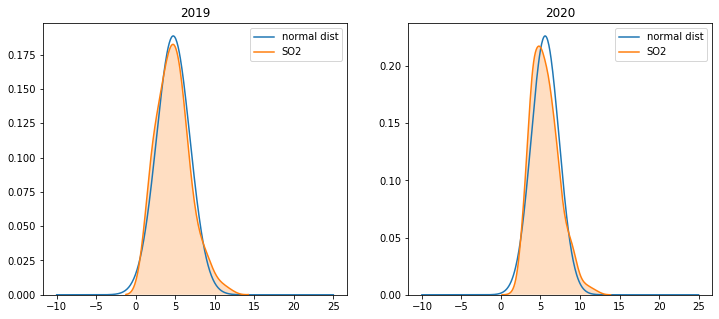

In [205]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

x = np.linspace(-10,25,500)
y = stats.norm.pdf(x,so2_19mean,so2_19sd) 
ax1.plot(x,y,label='normal dist') 
sns.kdeplot(so2_2019,shade=True,ax=ax1)
ax1.set_title('2019')

z = stats.norm.pdf(x,so2_20mean,so2_20sd)
ax2.plot(x,z,label='normal dist')
sns.kdeplot(so2_2020,shade=True,ax=ax2)
ax2.set_title('2020')

plt.show() 

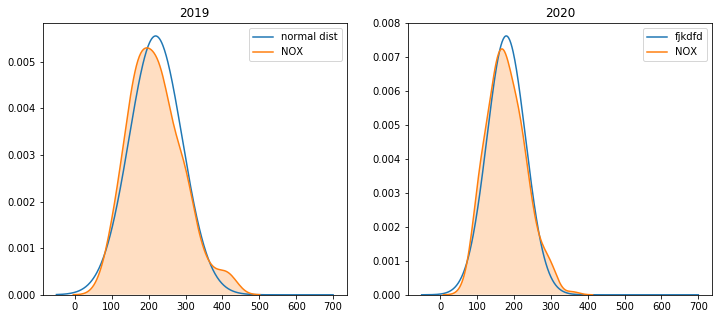

In [209]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

x = np.linspace(-50,700,500)
y = stats.norm.pdf(x,nox19mean,nox19sd) 
ax1.plot(x,y,label='normal dist') # normal continuous random variable of probability density function
sns.kdeplot(nox_2019,shade=True,ax=ax1)
ax1.set_title('2019')

z = stats.norm.pdf(x,nox20mean,nox20sd)
ax2.plot(x,z,label='fjkdfd')
sns.kdeplot(nox_2020,shade=True,ax=ax2)
ax2.set_title('2020')

plt.show() 


## 2 Population Hypothesis Testing

### $H_{0}$ : $µ_{2019}$ = $µ_{2020}$
### $H_{1}$ : $µ_{2019}$ > $µ_{2020}$

### alpha level of 5% (0.05) 
(confidence level = 95%)

Note:

Will conduct two sided tests, and then derive one sided p value from there. With symmetric distributions one-sided p-value is just half of the two-sided p-value)

#### Carbon monoxide levels

In [216]:
print('variance 2019 =',co19sd**2)
print('variance 2020 =',co20sd**2)
print(co19mean,'\n',co20mean)

variance 2019 = 233.83013744273222
variance 2020 = 443.6897791971097
74.39183673469388 
 59.618473895582326


In [213]:
## since variances are unequal

co_ttest = stats.ttest_ind_from_stats(mean1=co19mean, mean2=co20mean,
                                 std1=co19sd, std2=co20sd,
                                 nobs1=len(co_2019), nobs2=len(co_2020),
                                 equal_var=False)

In [214]:

# for this one tailed test, P VALUE:

print('p value =',co_ttest.pvalue/2)

p value = 5.3308364035842685e-18


=> p value < alpha. 

Reject null hypothesis. Evidence to show that mean levels of CO in 2019 were higher than in 2020.

#### Nitrogen Dioxide levels

In [220]:
# NO2
print('variance 2019 =',no2_19sd**2)
print('variance 2020 =',no2_20sd**2)
print('mean 2019=',no2_19mean)
print('mean 2020=',no2_20mean)
# unequal variances

no2_ttest = stats.ttest_ind_from_stats(mean1=no2_19mean, mean2=no2_20mean,
                                 std1=no2_19sd, std2=no2_20sd,
                                 nobs1=len(no2_2019), nobs2=len(no2_2020),
                                 equal_var=False)

variance 2019 = 634.4545439400251
variance 2020 = 389.72052063676387
mean 2019= 75.81224489795919
mean 2020= 62.30120481927711


In [219]:
# for this one tailed test, P VALUE:
print('p value=',no2_ttest.pvalue/2)

p value= 4.738091670060414e-11


=> p value < alpha.

Reject the Null hypothesis. Evidence to support claim that the mean levels of NO2 in 2019 were greater than in 2020.

#### Ozone

for ozone, the test will be opposite. We expect higher levels in 2020 than in 2019.

$H_{0}$ : $µ_{2020}$ = $µ_{2019}$

$H_{1}$ : $µ_{2020}$ > $µ_{2019}$


In [226]:
print('variance 2019=',ozone_19sd**2)
print('variance 2020=',ozone_20sd**2)
print('mean 2019=',ozone19mean)
print('mean 2020=',ozone20mean)

ozone_ttest = stats.ttest_ind_from_stats(mean1=ozone20mean, mean2=ozone19mean,
                                         std1=ozone_20sd, std2=ozone_19sd,
                                         nobs1=len(o3_2020), nobs2=len(o3_2019),
                                         equal_var=False)

variance 2019= 300.62517284464826
variance 2020= 289.2817535201045
mean 2019= 25.318367346938775
mean 2020= 26.433734939759034


In [227]:
## for this one tailed test, P VALUE:
print('p value=',ozone_ttest.pvalue/2)

p value= 0.2354264184543688


=> p value > alpha 

Fail to reject the null hypothesis. No evidence to show that ozone levels are significantly higher in 2020 than in 2019

#### PM 2.5

In [228]:
# FSP PM2.5

print('variance 2019=',fsp19sd**2)
print('variance 2020=',fsp20sd**2)
print('mean 2019=',fsp19mean)
print('mean 2020=',fsp20mean)


fsp_ttest = stats.ttest_ind_from_stats(mean1=fsp19mean, 
                                      mean2=fsp20mean, 
                                      std1=fsp19sd, 
                                      std2=fsp20sd, 
                                      nobs1=len(fsp_2019),
                                      nobs2=len(fsp_2020))

variance 2019= 106.97769262807165
variance 2020= 82.95127497943582
mean 2019= 24.416326530612245
mean 2020= 19.180722891566266


In [235]:
print('p value=',fsp_ttest.pvalue/2)

p value= 2.2283370478901655e-09


=> p value < alpha

reject null hypothesis.Evidence to show that PM2.5 levels in 2019 were higher than in 2020.

#### NOx

In [232]:
print('variance 2019=',nox19sd**2)
print('variance 2020=',nox20sd**2)
print('mean 2019=',nox19mean)
print('mean 2020=',nox20mean)


nox_ttest = stats.ttest_ind_from_stats(mean1=nox19mean, 
                                       mean2=nox20mean, 
                                       std1=nox19sd, 
                                       std2=nox20sd, 
                                       nobs1=len(nox_2019),
                                       nobs2=len(nox_2020))

variance 2019= 5165.2018325697645
variance 2020= 2737.164400574184
mean 2019= 218.89795918367346
mean 2020= 179.31726907630522


In [234]:
print('p value=',nox_ttest.pvalue/2)

p value= 4.047721918602673e-12


=> p value < alpha

reject null hypothesis.Evidence to show that levels in 2019 were higher than in 2020.

## Investigate correlation between Ozone and NO2, CO,SO2

1. CO and Ozone - check for correlation

Investigating whether there is ozone levels are dependent on co levels. FInd whether there is a positive or negative correlation between them.

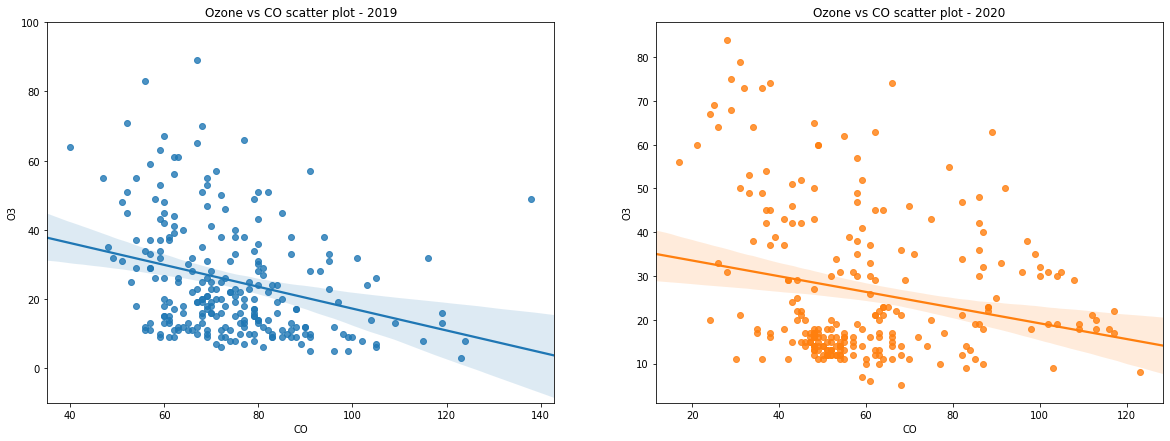

In [240]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,7))

sns.regplot(x=co_2019,y=o3_2019,scatter=True,ax=ax1,)
ax1.set(ylim=(-10, 100))
ax1.set_title('Ozone vs CO scatter plot - 2019')

sns.regplot(x=co_2020,y=o3_2020,scatter=True,ax=ax2)
ax2.set_title('Ozone vs CO scatter plot - 2020')

plt.show()

In [244]:
X = co_2019 
Y = o3_2019

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     20.44
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           9.60e-06
Time:                        22:01:38   Log-Likelihood:                -1036.7
No. Observations:                 245   AIC:                             2077.
Df Residuals:                     243   BIC:                             2084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.8164      5.306      9.201      0.0

In [246]:
X = co_2020 
Y = o3_2020

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     12.80
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           0.000416
Time:                        22:02:21   Log-Likelihood:                -1052.6
No. Observations:                 249   AIC:                             2109.
Df Residuals:                     247   BIC:                             2116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.1206      3.168     11.719      0.0

#### NO2 and Ozone - correlation analysis

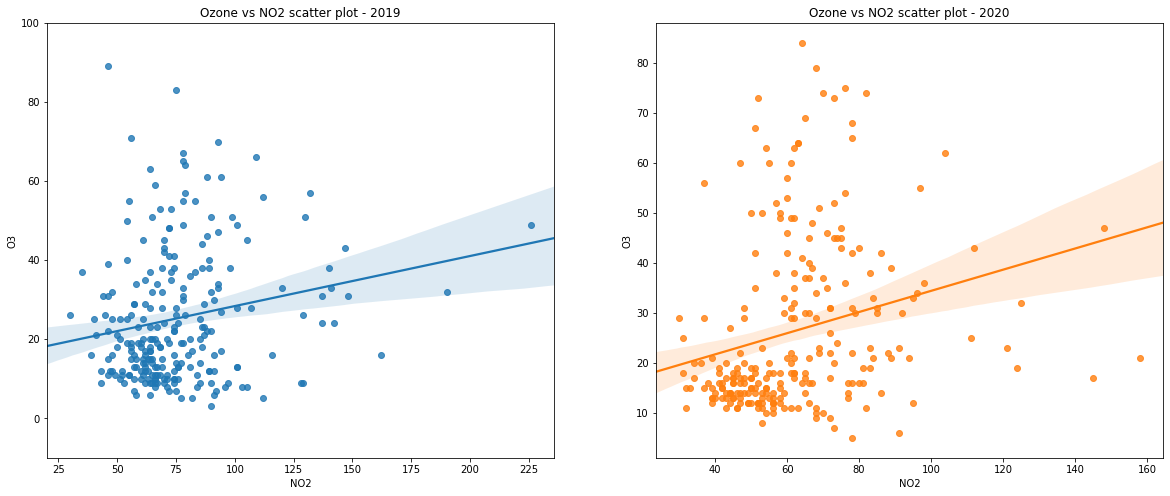

In [243]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

sns.regplot(x=no2_2019,y=o3_2019,scatter=True,ax=ax1)
ax1.set(ylim=(-10, 100))
ax1.set_title('Ozone vs NO2 scatter plot - 2019')

sns.regplot(x=no2_2020,y=o3_2020,scatter=True,ax=ax2)
ax2.set_title('Ozone vs NO2 scatter plot - 2020')

plt.show()

In [248]:
X = no2_2019 
Y = o3_2019

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     8.510
Date:                Sun, 27 Dec 2020   Prob (F-statistic):            0.00386
Time:                        22:03:04   Log-Likelihood:                -1042.4
No. Observations:                 245   AIC:                             2089.
Df Residuals:                     243   BIC:                             2096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.7192      3.467      4.533      0.0

In [250]:
X = no2_2020 
Y = o3_2020

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     15.83
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           9.11e-05
Time:                        22:03:59   Log-Likelihood:                -1051.2
No. Observations:                 249   AIC:                             2106.
Df Residuals:                     247   BIC:                             2113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2606      3.473      3.818      0.0

#### FSP and ozone correlation analysis

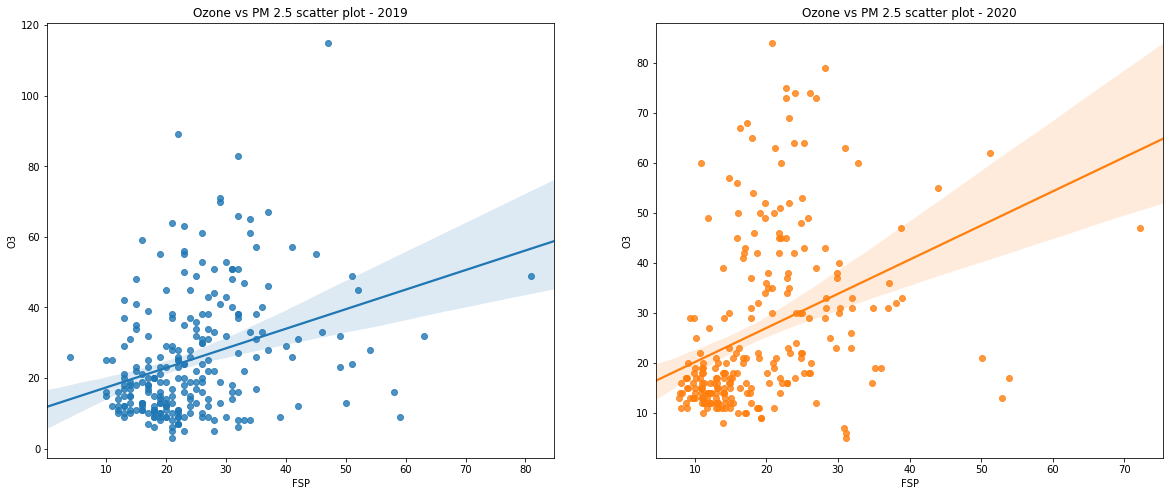

In [262]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

sns.regplot(x=fsp_2019,y=o3_2019,scatter=True,ax=ax1)
ax1.set_title('Ozone vs PM 2.5 scatter plot - 2019')

sns.regplot(x=fsp_2020,y=o3_2020,scatter=True,ax=ax2,x_jitter=0.3)
ax2.set_title('Ozone vs PM 2.5 scatter plot - 2020')

plt.show()

In [252]:
X = fsp_2019 
Y = o3_2019

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     29.82
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           1.17e-07
Time:                        22:05:51   Log-Likelihood:                -1032.4
No. Observations:                 245   AIC:                             2069.
Df Residuals:                     243   BIC:                             2076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7857      2.691      4.379      0.0

In [255]:
X = fsp_2020 
Y = o3_2020

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     38.06
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           2.79e-09
Time:                        22:06:43   Log-Likelihood:                -1041.1
No. Observations:                 249   AIC:                             2086.
Df Residuals:                     247   BIC:                             2093.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3461      2.349      5.683      0.0

#### NOX and ozone correlation analysis

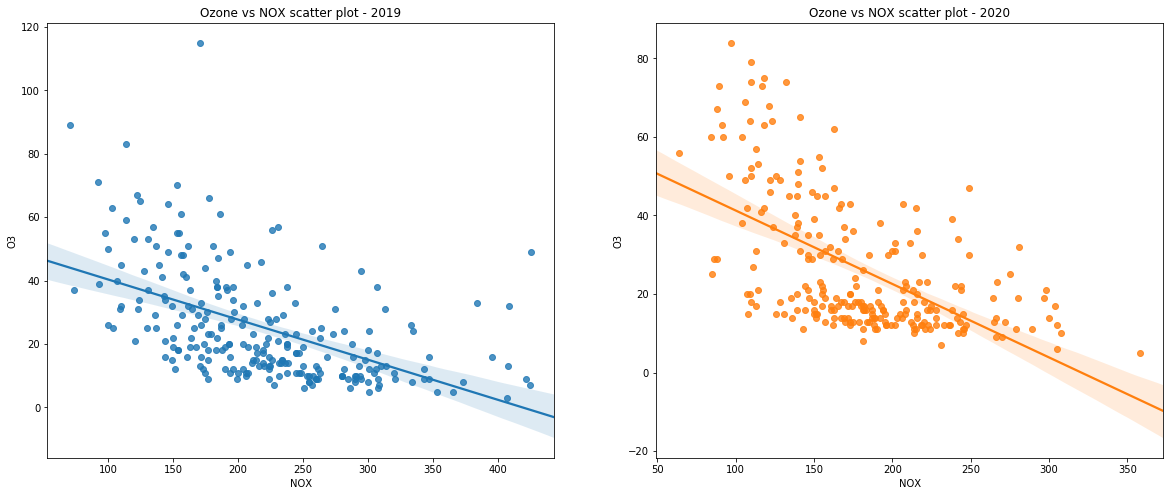

In [256]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

sns.regplot(x=nox_2019,y=o3_2019,scatter=True,ax=ax1)
ax1.set_title('Ozone vs NOX scatter plot - 2019')

sns.regplot(x=nox_2020,y=o3_2020,scatter=True,ax=ax2)
ax2.set_title('Ozone vs NOX scatter plot - 2020')

plt.show()

In [257]:
X = nox_2019 
Y = o3_2019

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     92.06
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           1.08e-18
Time:                        22:08:40   Log-Likelihood:                -1007.3
No. Observations:                 245   AIC:                             2019.
Df Residuals:                     243   BIC:                             2026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9999      3.037     17.454      0.0

In [258]:
X = nox_2020 
Y = o3_2020

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           2.52e-23
Time:                        22:08:51   Log-Likelihood:                -1008.9
No. Observations:                 249   AIC:                             2022.
Df Residuals:                     247   BIC:                             2029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9599      3.161     18.969      0.0

In [267]:
f1 = open('air_hourly.csv')
f2 = open('air_hourly-3.csv')
f3 = open('air_hourly-4.csv')
f4 = open('air_hourly-5.csv')

In [268]:
h1 = pd.read_csv(f1)
h2 = pd.read_csv(f2)
h3 = pd.read_csv(f3)
h4 = pd.read_csv(f4)

In [269]:
h1 = h1.apply(pd.to_numeric, errors='coerce')
h2 = h2.apply(pd.to_numeric, errors='coerce')
h3 = h3.apply(pd.to_numeric, errors='coerce')
h4 = h4.apply(pd.to_numeric, errors='coerce')

In [274]:
h1 = h1[['NO2','NOX','O3']]
h2 = h2[['NO2','NOX','O3']]
h3 = h3[['NO2','NOX','O3']]
h4 = h4[['NO2','NOX','O3']]

In [276]:
h1.dropna(inplace=True,how='any',axis=0)
h2.dropna(inplace=True,how='any',axis=0)
h3.dropna(inplace=True,how='any',axis=0)
h4.dropna(inplace=True,how='any',axis=0)

/Users/milindsharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/milindsharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/milindsharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

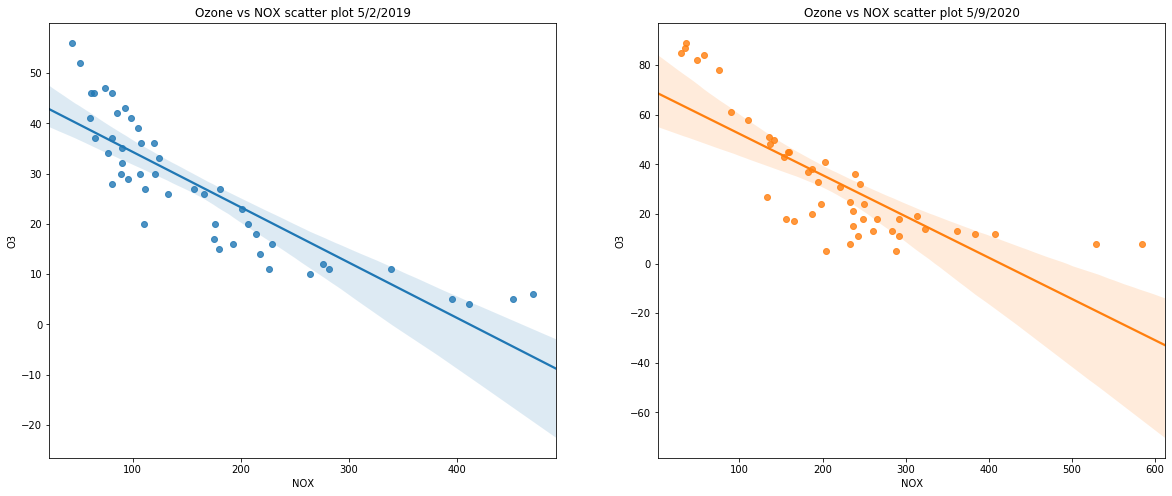

In [290]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

sns.regplot(x=h1['NOX'],y=h1['O3'],scatter=True,ax=ax1)
ax1.set_title('Ozone vs NOX scatter plot 5/2/2019')

sns.regplot(x=h3['NOX'],y=h3['O3'],scatter=True,ax=ax2)
ax2.set_title('Ozone vs NOX scatter plot 5/9/2020')

plt.show()

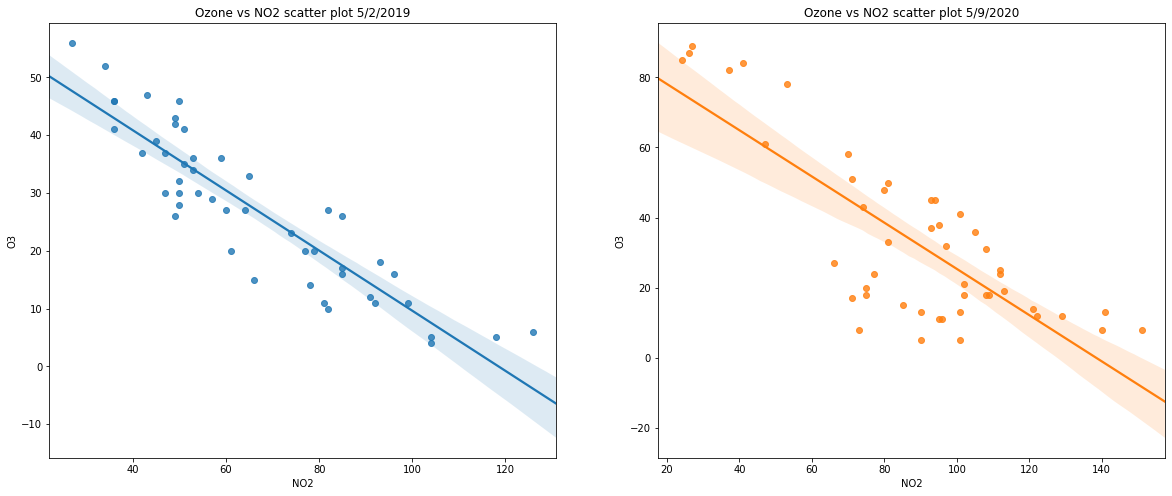

In [291]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

sns.regplot(x=h1['NO2'],y=h1['O3'],scatter=True,ax=ax1)
ax1.set_title('Ozone vs NO2 scatter plot 5/2/2019')

sns.regplot(x=h3['NO2'],y=h3['O3'],scatter=True,ax=ax2)
ax2.set_title('Ozone vs NO2 scatter plot 5/9/2020')

plt.show()

In [285]:
X = h1['NO2']
Y = h1['O3']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     204.5
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           1.52e-18
Time:                        23:11:41   Log-Likelihood:                -152.09
No. Observations:                  48   AIC:                             308.2
Df Residuals:                      46   BIC:                             311.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.6754      2.546     24.229      0.0

In [286]:
X = h1['NOX']
Y = h1['O3']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     142.0
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           1.15e-15
Time:                        23:11:59   Log-Likelihood:                -158.97
No. Observations:                  48   AIC:                             321.9
Df Residuals:                      46   BIC:                             325.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.2870      1.795     25.228      0.0

In [288]:
X = h3['NO2']
Y = h3['O3']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     74.80
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           4.00e-11
Time:                        23:12:30   Log-Likelihood:                -193.54
No. Observations:                  47   AIC:                             391.1
Df Residuals:                      45   BIC:                             394.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.2471      7.090     12.870      0.0

In [289]:
X = h3['NOX']
Y = h3['O3']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     73.08
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           5.55e-11
Time:                        23:12:40   Log-Likelihood:                -193.88
No. Observations:                  47   AIC:                             391.8
Df Residuals:                      45   BIC:                             395.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.9390      4.760     14.484      0.0

In [ ]:
fig,(ax1,ax2) = plt.subplots(figsize=(15,8),nrows=2,ncols=1,sharey=False)

ax1.plot(np.arange(0,60,1),so2_2019[0:60], 'or-')

ax2.plot(np.arange(0,60,1),o3_2019[0:60], 'ob-')
plt.show()

In [ ]:
## ADD T TEST FOR SO2, DECIDE WHETHER TO KEEP FSP OR NOT

## CONSIDER CONFIDENCE INTERVALS AND GOODNESS OF FIT

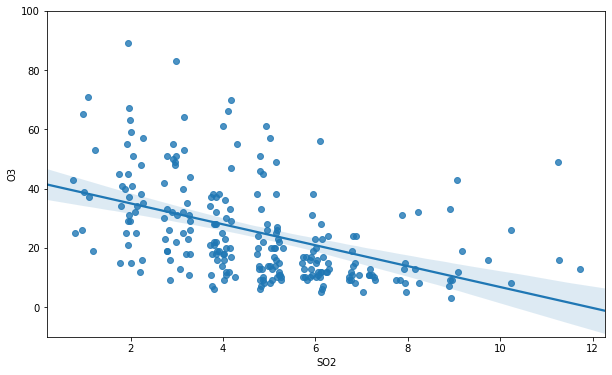

In [259]:
plt.figure(figsize=(10,6))
sns.regplot(x=so2_2019,y=o3_2019,scatter=True,x_jitter=0.3)
plt.ylim(-10,100)

plt.show()